In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cipla = yf.download('CIPLA.NS')

[*********************100%%**********************]  1 of 1 completed


In [19]:
reddys =yf.download('DRREDDY.NS')

[*********************100%%**********************]  1 of 1 completed


In [20]:
divis = yf.download('DIVISLAB.NS')

[*********************100%%**********************]  1 of 1 completed


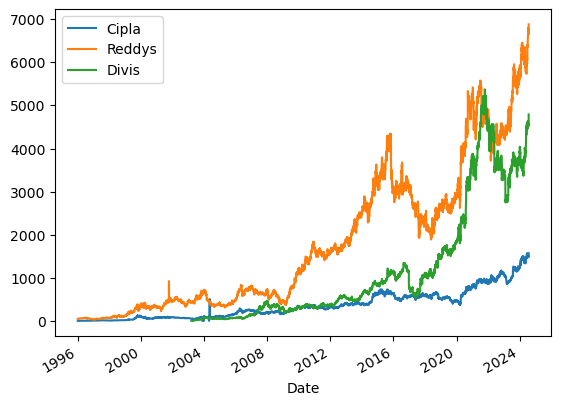

In [21]:
cipla['Close'].plot(label ='Cipla')
reddys['Close'].plot(label ='Reddys')
divis['Close'].plot(label='Divis')
plt.legend()

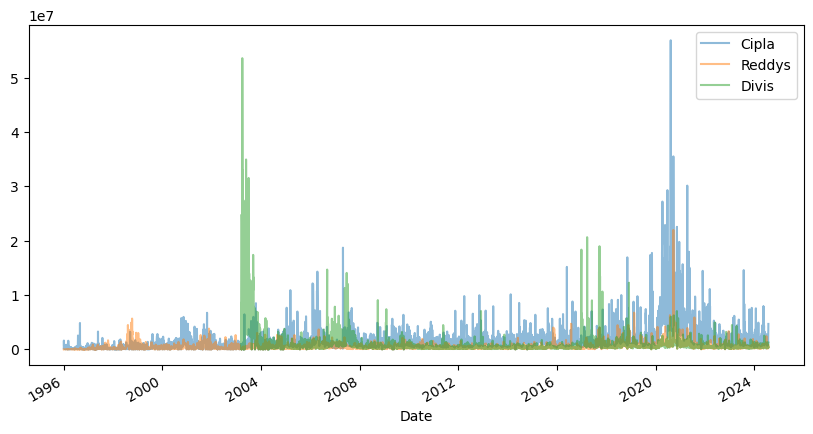

In [22]:
cipla['Volume'].plot(label ='Cipla', alpha =0.5, figsize=(10,5))
reddys['Volume'].plot(label ='Reddys', alpha =0.5)
divis['Volume'].plot(label='Divis', alpha=0.5)
plt.legend()

In [26]:
cipla.iloc[[cipla['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-10,760.0,814.5,751.349976,795.599976,774.665039,56895213


In [28]:
cipla['Volume'].argmax()

6195

In [23]:
reddys['Volume'].max()

21987078

<Axes: xlabel='Date'>

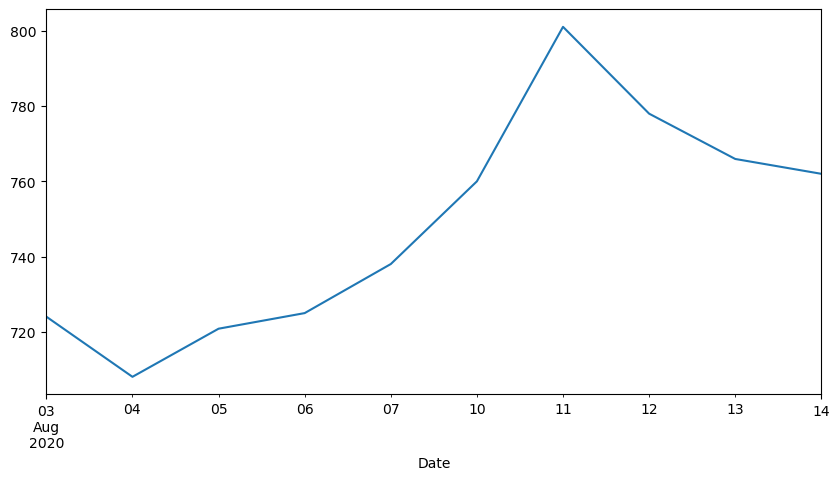

In [33]:
cipla.iloc[6190:6200]['Open'].plot(figsize=(10,5))

In [34]:
##Total Trade
cipla['Total Traded']= cipla['Open']* cipla['Volume']
reddys['Total Traded']= reddys['Open']* reddys['Volume']
divis['Total Traded']= divis['Open']* divis['Volume']

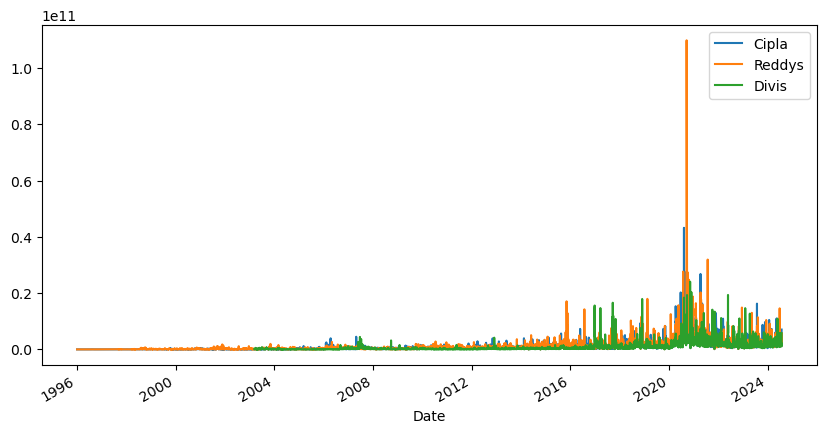

In [37]:
cipla['Total Traded'].plot(label ='Cipla', figsize=(10,5))
reddys['Total Traded'].plot(label ='Reddys')
divis['Total Traded'].plot(label ='Divis')
plt.legend()

In [39]:
reddys['Total Traded'].max()

109935390000.0

<Axes: xlabel='Date'>

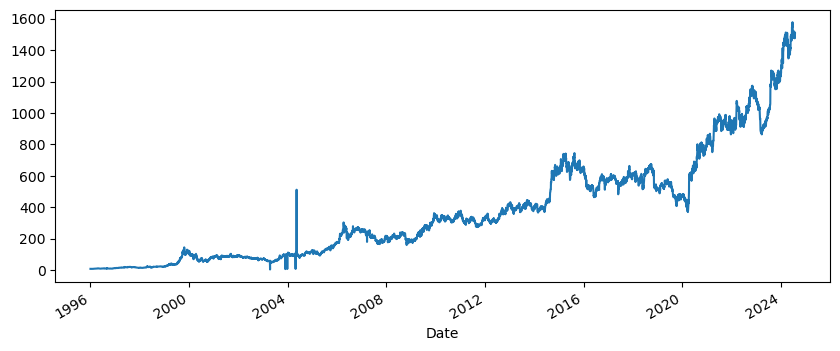

In [42]:
cipla['Open'].plot(figsize=(10,4))

In [43]:
##Calculate moving average 
cipla['MA50']= cipla['Open'].rolling(50).mean()

In [47]:
cipla['MA100']= cipla['Open'].rolling(100).mean()

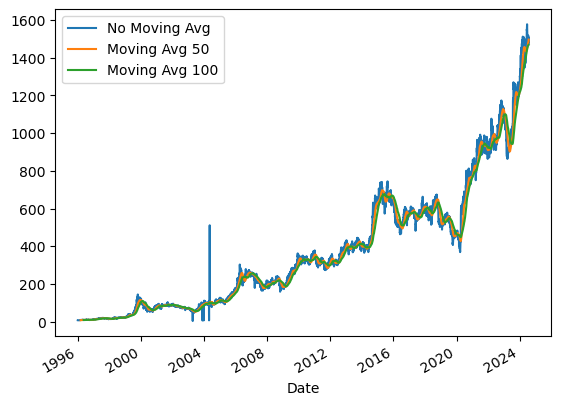

In [51]:
cipla['Open'].plot(label ='No Moving Avg')
cipla['MA50'].plot(label ='Moving Avg 50')
cipla['MA100'].plot(label ='Moving Avg 100')
plt.legend()
#Moving Avg 100 is generates a better curve and accurately captures the highs and lows of the stock values

In [61]:
#is there any correlation between stocks from different companies?
from pandas.plotting import scatter_matrix
healthcare_df = pd.concat([cipla['Open'], divis['Open'], reddys['Open']], axis=1)
healthcare_df.columns =['Cipla', 'Divis','Reddys']

In [62]:
healthcare_df

,Cipla,Divis,Reddys
Date,,,
1996-01-01,8.778666,NaN,56.400002
1996-01-02,8.832000,NaN,55.750000
1996-01-03,8.720000,NaN,55.275002
1996-01-04,8.658666,NaN,55.299999
1996-01-05,8.568000,NaN,53.312500
...,...,...,...
2024-07-22,1475.050049,4500.000000,6580.000000
2024-07-23,1490.000000,4521.000000,6770.000000
2024-07-24,1495.349976,4506.200195,6938.899902


array([[<Axes: xlabel='Cipla', ylabel='Cipla'>,
        <Axes: xlabel='Divis', ylabel='Cipla'>,
        <Axes: xlabel='Reddys', ylabel='Cipla'>],
       [<Axes: xlabel='Cipla', ylabel='Divis'>,
        <Axes: xlabel='Divis', ylabel='Divis'>,
        <Axes: xlabel='Reddys', ylabel='Divis'>],
       [<Axes: xlabel='Cipla', ylabel='Reddys'>,
        <Axes: xlabel='Divis', ylabel='Reddys'>,
        <Axes: xlabel='Reddys', ylabel='Reddys'>]], dtype=object)

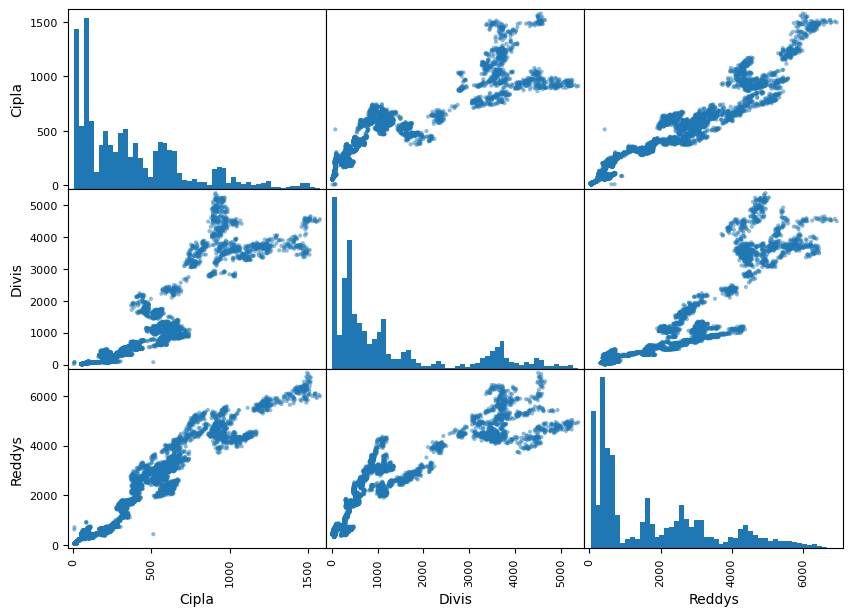

In [65]:
scatter_matrix(healthcare_df, figsize=(10,7), hist_kwds={'bins':50}, alpha =0.5)

In [ ]:
##None seem to be correlated

In [80]:
#Check volatility of the stocks based on the daily percentage change
#r = (p(t)/p(t-1)) -1
cipla['returns']= (cipla['Close']/cipla['Close'].shift(1))-1

In [81]:
divis['returns']= (divis['Close']/divis['Close'].shift(1))-1
reddys['returns']= (reddys['Close']/reddys['Close'].shift(1))-1

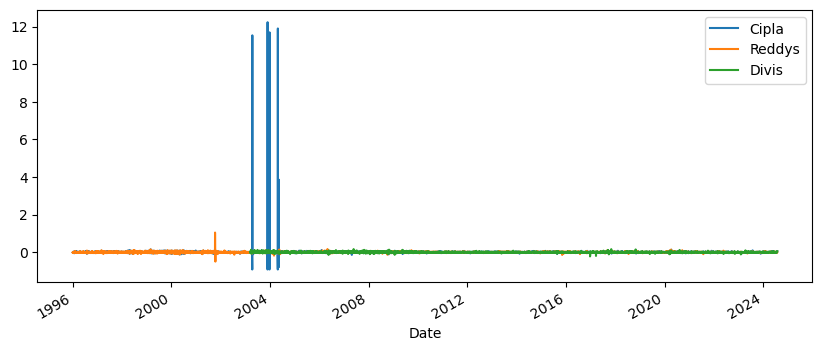

In [83]:
cipla['returns'].plot(label ='Cipla', figsize =(10,4))
reddys['returns'].plot(label ='Reddys')
divis['returns'].plot(label ='Divis')
plt.legend()

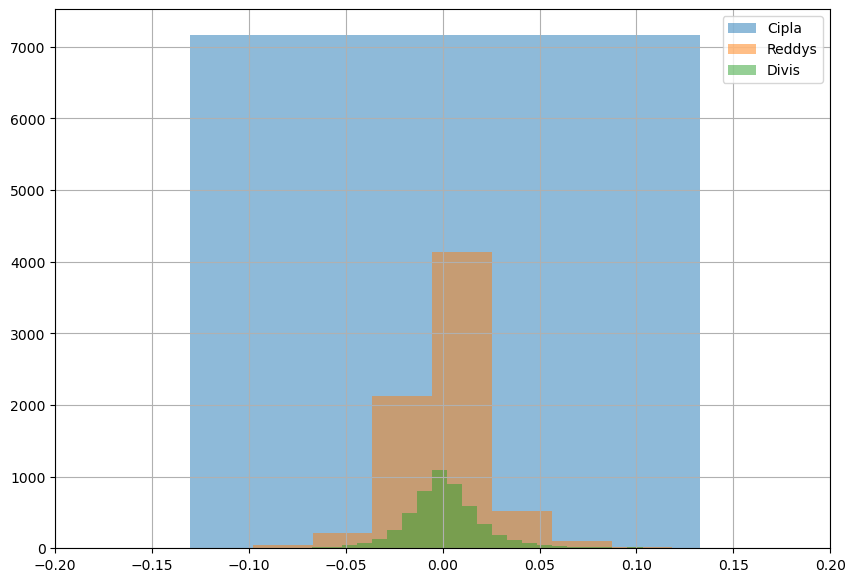

In [94]:
cipla['returns'].hist(bins =50,label ='Cipla',alpha =0.5, figsize=(10,7))
reddys['returns'].hist(bins =50,label ='Reddys',alpha =0.5)
divis['returns'].hist(bins =50,label ='Divis',alpha =0.5)
plt.xlim(-0.2,0.2)
plt.legend()

In [91]:
##Overall less volatile, but Cipla has more variance, a wider histogram compared to the rest

(-0.2, 0.2)

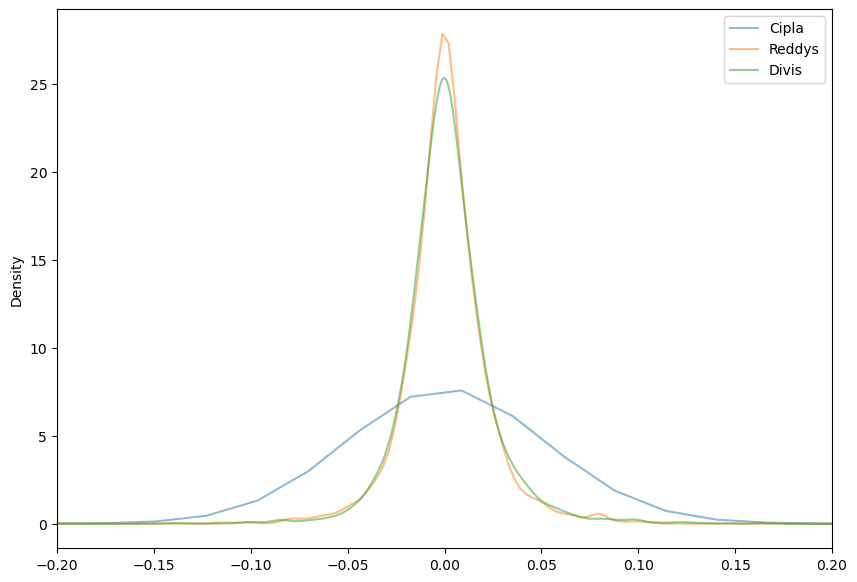

In [93]:
cipla['returns'].plot(kind ='kde',label ='Cipla',alpha =0.5, figsize=(10,7))
reddys['returns'].plot(kind ='kde',label ='Reddys',alpha =0.5)
divis['returns'].plot(kind ='kde',label ='Divis',alpha =0.5)
plt.legend()
plt.xlim([-0.2,0.2])

In [95]:
#Cipla has wider kde plot

In [98]:
box_df = pd.concat([cipla['returns'], reddys['returns'],divis['returns']], axis=1)
box_df.columns =['Cipla','Reddys','Divis']

In [99]:
box_df

,Cipla,Reddys,Divis
Date,,,
1996-01-01,NaN,NaN,NaN
1996-01-02,-0.012681,-0.008520,NaN
1996-01-03,-0.007034,0.000452,NaN
1996-01-04,-0.010471,-0.035940,NaN
1996-01-05,-0.002490,-0.023681,NaN
...,...,...,...
2024-07-22,0.003029,0.020328,0.003319
2024-07-23,0.005302,0.013898,-0.001720
2024-07-24,0.003739,-0.006533,0.005434


<Axes: >

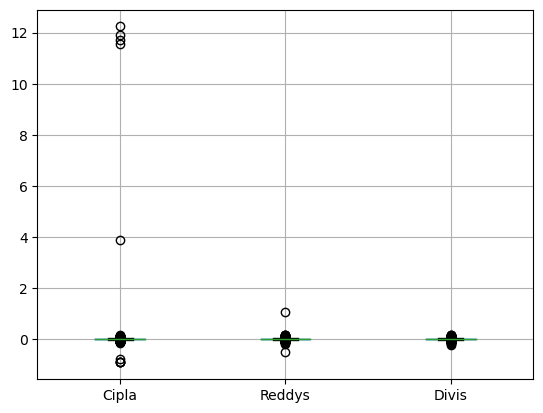

In [100]:
box_df.boxplot()

In [ ]:
##Cipla has more number of outliers, Divis has least number of volatile stocks

In [101]:
##Cumulative returns - which calculates how much  1 rupee(invested earlier) amounts to in todays market 
#i(t) = (1+r(t))*i(t-1)
cipla['c_returns'] = (1+cipla['returns']).cumprod()
reddys['c_returns'] = (1+reddys['returns']).cumprod()
divis['c_returns'] = (1+divis['returns']).cumprod()


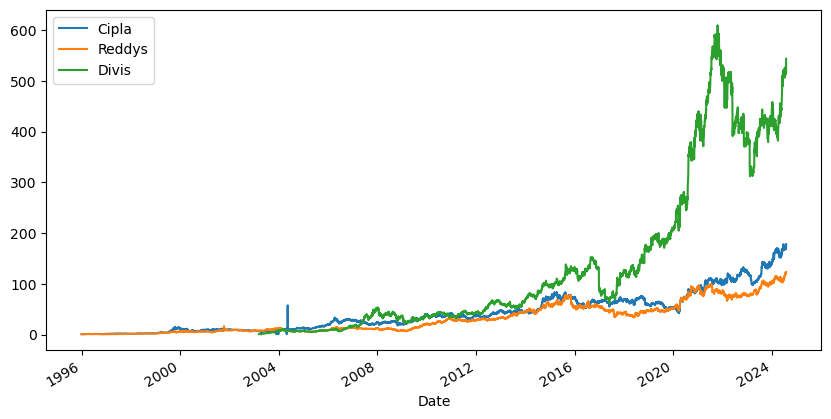

In [116]:
cipla['c_returns'].plot(label ='Cipla', figsize=(10,5))
reddys['c_returns'].plot(label ='Reddys')
divis['c_returns'].plot(label ='Divis')
plt.legend()


In [121]:
reddys.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,c_returns
Date,,,,,,,,,
1996-01-01,56.400002,56.500000,55.750000,55.750000,47.806965,2800,157920.004272,NaN,NaN
1996-01-02,55.750000,55.750000,55.262501,55.275002,47.399635,8400,468300.000000,-0.008520,0.991480
1996-01-03,55.275002,55.625000,55.250000,55.299999,47.421089,11200,619080.017090,0.000452,0.991928
1996-01-04,55.299999,53.750000,53.037498,53.312500,45.716755,3600,199079.997253,-0.035940,0.956278
1996-01-05,53.312500,53.987499,52.000000,52.049999,44.634129,12000,639750.000000,-0.023681,0.933632


In [123]:
divis.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,returns,c_returns
Date,,,,,,,,,
2003-03-12,7.75,9.1950,7.7500,8.8125,7.301250,24669040,1.911851e+08,NaN,NaN
2003-03-13,8.70,9.3325,8.7000,9.0000,7.456596,23553560,2.049160e+08,0.021277,1.021277
2003-03-14,9.00,9.0000,9.0000,9.0000,7.456596,0,0.000000e+00,0.000000,1.021277
2003-03-17,9.00,9.0000,8.3825,8.5500,7.083767,3533080,3.179772e+07,-0.050000,0.970213
2003-03-18,8.55,8.5500,8.5500,8.5500,7.083767,0,0.000000e+00,0.000000,0.970213


In [124]:
##Divis has a good cumulative product result ,1 rupee invested during 2003 amounts to around 550 rupees today
7.75*550

4262.5

In [122]:
56*110

6160

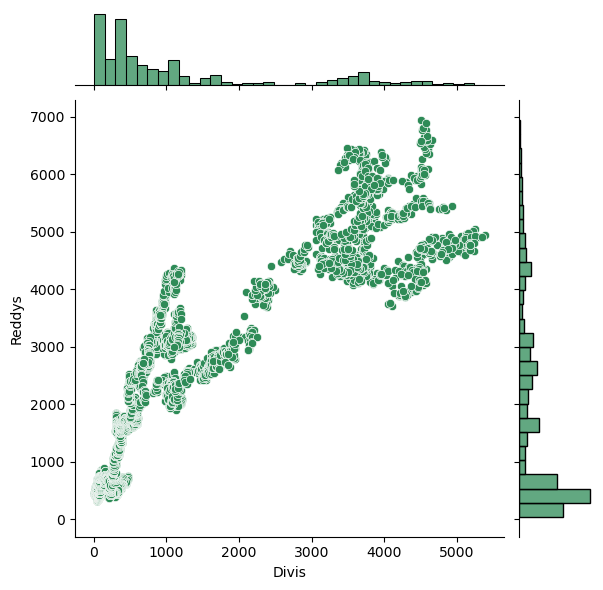

In [145]:
#correlation with stocks from different company
sns.jointplot(x='Divis',y='Reddys', data =healthcare_df, kind='scatter',color ='seagreen')

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


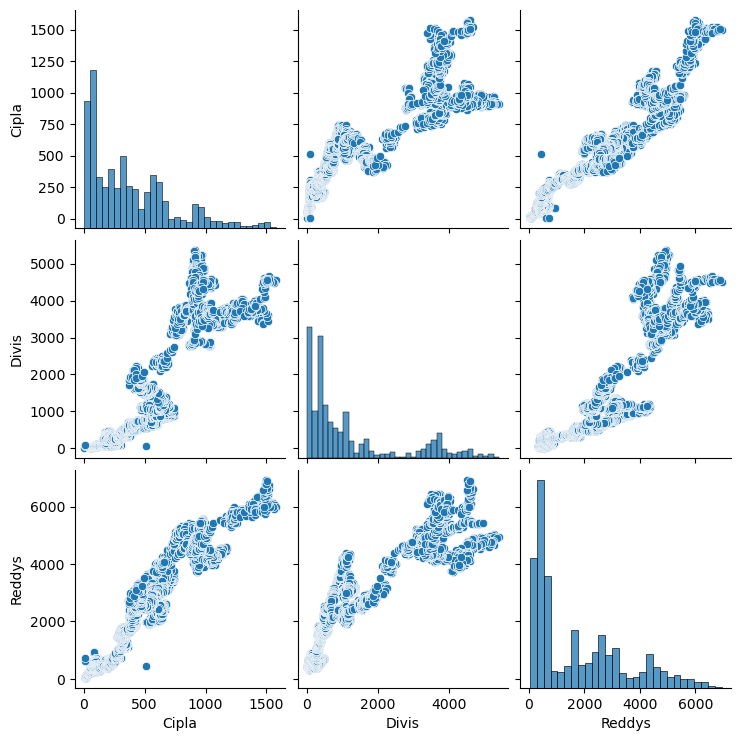

In [146]:
sns.pairplot(healthcare_df)

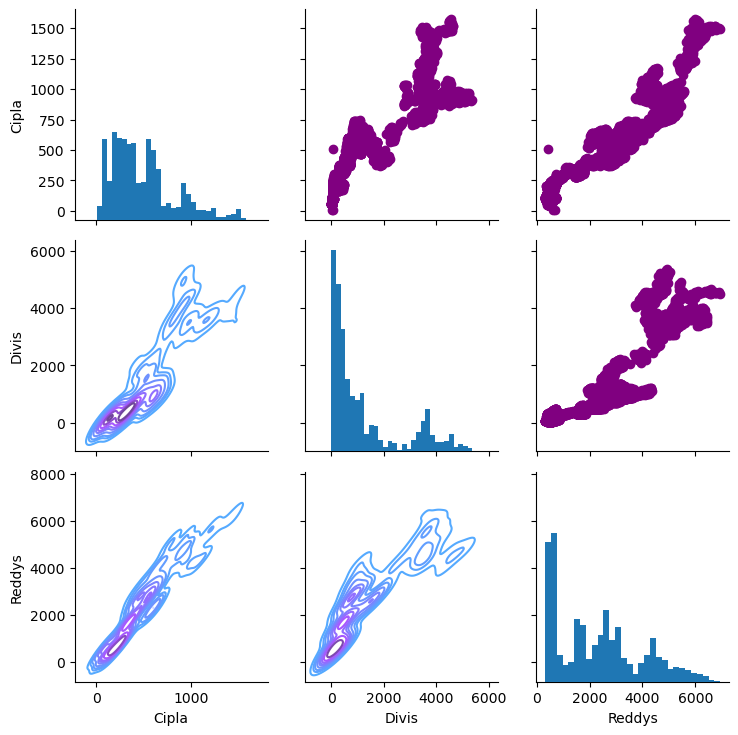

In [147]:
return_fig = sns.PairGrid(healthcare_df.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins= 30)

In [148]:
#IT looks ike cipla and reddys do have some kind of correlation

In [152]:
corr_matrix = healthcare_df.dropna().corr()

In [153]:
corr_matrix

,Cipla,Divis,Reddys
Cipla,1.000000,0.894733,0.952897
Divis,0.894733,1.000000,0.894171
Reddys,0.952897,0.894171,1.000000


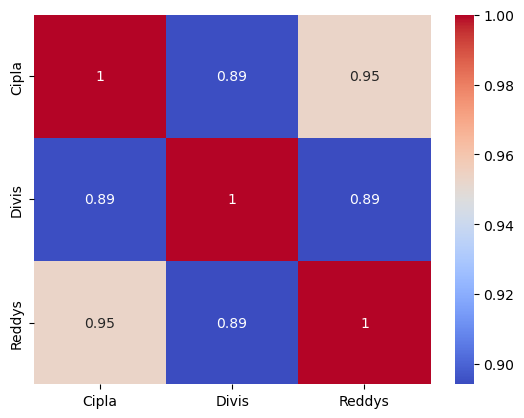

In [154]:
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [155]:
##positive and strong correlation between stocks of Divis, Reddys and Cipla


In [158]:
##analysing the risks
rets = box_df.dropna()

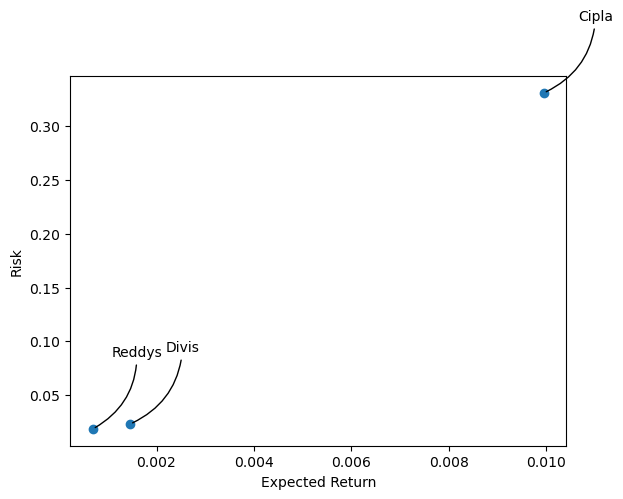

In [180]:
#expected return - mean of daily returns
# risk - standard deviation of daily returns
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


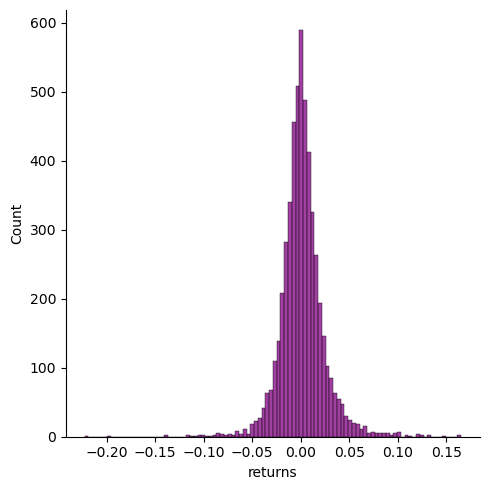

In [187]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(divis['returns'].dropna(),bins=100,color='purple')

Quantiles are values that divide a dataset into equal-sized intervals. The 0.05 quantile (or 5th percentile) is a specific point in the data below which 5% of the data falls. It gives a sense of the lower extreme of the dataset.

Downside Risk: It helps in understanding the downside risk of the stock. The 5th percentile indicates how bad the returns can get on the worst 5% of trading days.


Value at Risk (VaR): This is a commonly used risk measure that estimates the potential loss in value of an asset or portfolio over a defined period for a given confidence interval. The 5th percentile return can serve as a measure of VaR at a 95% confidence level.


In [192]:
# The 0.05 empirical quantile of daily returns
emp_quart= rets['Divis'].quantile(0.05)

In [194]:
emp_quart

-0.030699003944956643

The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, our worst daily loss will not exceed 3%. If we have a 1 million dollar investment, our one-day 5% VaR is

In [193]:
 emp_quart * 1000000

-30699.003944956643



The mean gives a central value around which the daily returns are distributed. It represents the average return that an investor might expect to receive on a typical day.
This helps in understanding the general trend of the investment’s performance.
Standard Deviation of Daily Returns as Risk:

The standard deviation measures the amount of variation or dispersion from the mean. It indicates how much the returns deviate from the average return.
A higher standard deviation means greater volatility, implying higher risk. Conversely, a lower standard deviation indicates more stable returns, implying lower risk.